In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from mmsplice.utils import max_varEff


In [110]:
data_benign = pd.read_csv("pred_benign.csv")
data_pathogen = pd.read_csv("pred_pathogen.csv")

In [111]:
data_benign.head()

,ID,exons,exon_id,gene_id,gene_name,transcript_id,delta_logit_psi,ref_acceptorIntron,ref_acceptor,ref_exon,ref_donor,ref_donorIntron,alt_acceptorIntron,alt_acceptor,alt_exon,alt_donor,alt_donorIntron,pathogenicity,efficiency
0,1:874778:GCCTCCCCAGCCACGGTGAGGACCCACCCTGGCATGA...,1:874654-874792:+,ENST00000341065.5,ENSG00000187634,ENSG00000187634,ENST00000341065,-8.626818,-4.815811,2.295589,-2.551278,5.476105,-0.039652,-4.815811,2.295589,-2.491574,-4.064222,-0.366048,1.000000,-9.992463
1,1:874778:GCCTCCCCAGCCACGGTGAGGACCCACCCTGGCATGA...,1:874654-874840:+,ENST00000342066.7,ENSG00000187634,ENSG00000187634,ENST00000342066,0.287881,-4.815811,2.295589,-2.736877,5.476105,-0.196461,-4.815811,2.295589,-2.551278,5.476105,-0.196461,0.132711,0.589476
2,1:874778:GCCTCCCCAGCCACGGTGAGGACCCACCCTGGCATGA...,1:874654-874840:+,ENST00000455979.1,ENSG00000187634,ENSG00000187634,ENST00000455979,0.287881,-1.265571,2.441534,-2.736877,5.476105,-0.196461,-1.265571,2.441534,-2.551278,5.476105,-0.196461,0.109622,0.589476
3,1:879481:G>C,1:879077-879639:+,ENST00000455979.7,ENSG00000187634,ENSG00000187634,ENST00000455979,0.053373,-4.116316,8.160126,-3.439501,-2.088679,0.105083,-4.116316,8.160126,-3.405433,-2.088679,0.105083,0.746855,0.008200
4,1:879481:G>C,1:879287-879955:+,ENST00000341065.12,ENSG00000187634,ENSG00000187634,ENST00000341065,0.045006,-4.425405,4.345113,-3.600469,-3.287131,0.105083,-4.425405,4.345113,-3.571806,-3.287131,0.105083,0.924715,-0.012537


In [112]:
data_pathogen.head()

,ID,exons,exon_id,gene_id,gene_name,transcript_id,delta_logit_psi,ref_acceptorIntron,ref_acceptor,ref_exon,ref_donor,ref_donorIntron,alt_acceptorIntron,alt_acceptor,alt_exon,alt_donor,alt_donorIntron,pathogenicity,efficiency
0,1:949523:C>T,1:949363-949920:+,ENST00000379389.2,ENSG00000187608,ENSG00000187608,ENST00000379389,-0.068770,-4.074125,3.531887,-2.727509,-2.481291,0.105083,-4.074125,3.531887,-2.772364,-2.481291,0.105083,0.889766,-0.294554
1,1:949696:C>CG,1:949363-949920:+,ENST00000379389.2,ENSG00000187608,ENSG00000187608,ENST00000379389,-0.031726,-4.074125,3.531887,-2.727509,-2.481291,0.105083,-4.074125,3.531887,-2.748428,-2.481291,0.105083,0.890521,-0.202733
2,1:949739:G>T,1:949363-949920:+,ENST00000379389.2,ENSG00000187608,ENSG00000187608,ENST00000379389,-0.075680,-4.074125,3.531887,-2.727509,-2.481291,0.105083,-4.074125,3.531887,-2.776829,-2.481291,0.105083,0.889625,-0.311681
3,1:957605:G>A,1:957580-957842:+,ENST00000379370.2,ENSG00000188157,ENSG00000188157,ENST00000379370,0.159484,-3.623475,3.502046,-2.426510,4.601789,0.298136,-3.623475,3.502046,-2.323876,4.601789,0.298136,0.150444,0.271219
4,1:957693:A>T,1:957580-957842:+,ENST00000379370.2,ENSG00000188157,ENSG00000188157,ENST00000379370,0.002345,-3.623475,3.502046,-2.426510,4.601789,0.298136,-3.623475,3.502046,-2.425414,4.601789,0.298136,0.146305,-0.118283


In [51]:
data_pathogen["pathogenicity"].head()

0    0.889766
1    0.890521
2    0.889625
3    0.150444
4    0.146305
Name: pathogenicity, dtype: float64

In [113]:
data_pathogen = max_varEff(data_pathogen)
data_benign = max_varEff(data_benign)

mean_pathogenicity_pathogen = data_pathogen["pathogenicity"].mean()
mean_pathogenicity_benign = data_benign["pathogenicity"].mean()

In [115]:
print(f"mean pathogenicity (pathogenic variants): {mean_pathogenicity_pathogen}")
print(f"mean pathogenicity (benign variants): {mean_pathogenicity_benign}")

mean pathogenicity (pathogenic variants): 0.45831866391968673
mean pathogenicity (benign variants): 0.3849847758024938


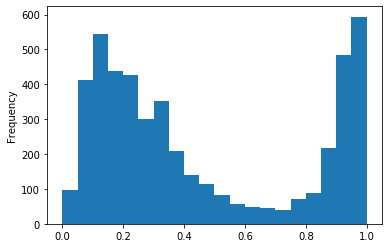

In [55]:
hist_pathogenicity_pathogen = data_pathogen["pathogenicity"].plot.hist(bins=20)

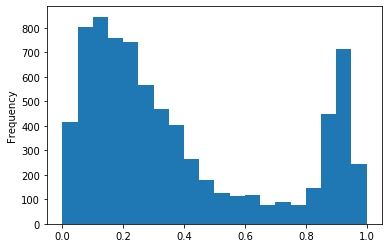

In [56]:
hist_pathogenicity_benign = data_benign["pathogenicity"].plot.hist(bins=20)

In [100]:
benign_path_scores = data_benign.loc[:,"pathogenicity_benign"].values
pathogen_path_scores = data_pathogen.loc[:,"pathogenicity_path"].values


In [119]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = (np.arange(1, n+1)/n)*100
    return x,y

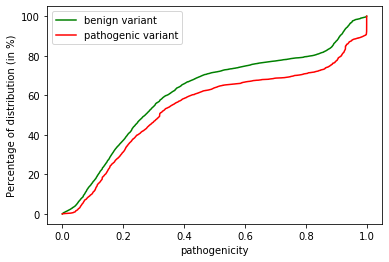

In [123]:
x_benign, y_benign = ecdf(benign_path_scores)
x_path, y_path = ecdf(pathogen_path_scores)

plt.plot(x_benign,y_benign, label="benign variants", color='green')
plt.plot(x_path,y_path, label="pathogenic variants", color='red')

plt.xlabel("pathogenicity")
plt.ylabel("Percentage of distribution (in %)")
plt.legend(("benign variant", "pathogenic variant"))
plt.show()